In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving stock_market_dataset.csv to stock_market_dataset.csv


In [ ]:
df = pd.read_csv('stock_market_dataset.csv')
df

,Stock,Date,Open,High,Low,Close,Volume,SMA_10,RSI,MACD,Bollinger_Upper,Bollinger_Lower,GDP_Growth,Inflation_Rate,Interest_Rate,Sentiment_Score,Next_Close,Target
0,AAPL,2010-01-04,445.627510,465.464143,431.513035,450.378213,2441288,301.310351,64.061774,2.449751,464.398638,438.231589,2.845199,1.505217,4.360374,-0.079418,445.714557,0
1,AAPL,2010-01-05,441.194244,449.726464,432.618124,437.397748,4714199,280.015623,52.032235,-3.726473,450.099041,431.018080,3.352677,1.516110,2.309996,0.511900,439.507357,1
2,AAPL,2010-01-07,395.417421,399.413060,385.055059,388.718345,3948217,323.131496,71.817441,-4.215862,396.010670,374.092744,3.471209,2.256823,0.984588,0.049279,387.335810,0
3,AAPL,2010-01-11,478.631057,501.639769,461.991967,484.401144,3637733,273.944016,67.133451,1.574418,496.399599,479.317188,2.962110,2.238436,1.754234,0.737874,476.642532,0
4,AAPL,2010-01-12,179.950904,183.900759,175.076588,181.516782,693492,237.354447,84.797294,1.552505,189.479672,171.610610,2.727858,2.378014,2.562107,-0.905092,182.863272,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50344,TSLA,2202-12-01,252.632973,255.849960,246.056470,253.503707,4231791,308.690354,52.049065,0.006139,263.440844,244.288946,3.139296,2.056435,2.671630,0.859307,248.582750,0
50345,TSLA,2202-12-09,144.930034,149.742444,136.559836,142.888733,3163615,251.171784,69.407608,3.285598,156.125748,135.966587,2.904545,1.660142,2.454363,-0.036178,141.163357,0
50346,TSLA,2202-12-13,309.154585,318.731779,300.264935,310.458377,4277458,261.636379,46.411470,-3.419487,322.696934,299.873656,3.148182,2.483237,2.008409,0.915237,310.223950,0
50347,TSLA,2202-12-15,195.542188,198.632883,191.095971,193.650255,1049336,276.348336,28.515595,-2.786398,198.772974,184.331390,2.671756,1.795277,4.345577,-0.836666,190.725552,0


<Axes: >

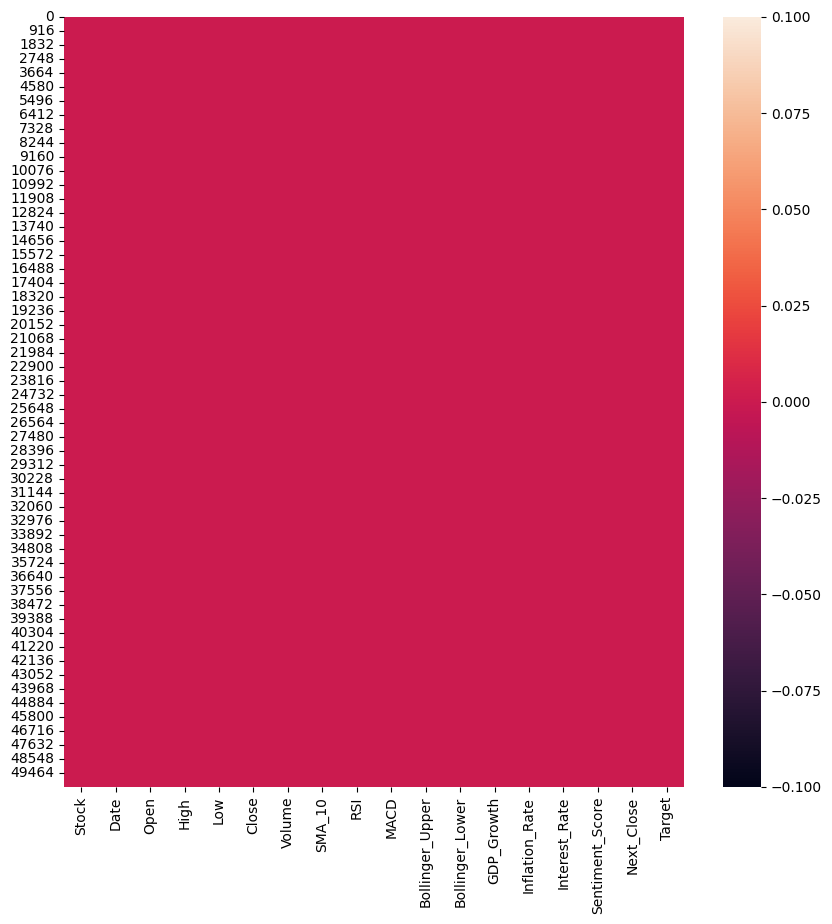

In [ ]:
# 1. Are there missing values in the dataset?

plt.figure(figsize=(10,10))
sns.heatmap(df.isnull())

### this data does not have any null values

In [ ]:
# 2. What is the data type of each column?
print(df.dtypes)

Stock               object
Date                object
Open               float64
High               float64
Low                float64
Close              float64
Volume               int64
SMA_10             float64
RSI                float64
MACD               float64
Bollinger_Upper    float64
Bollinger_Lower    float64
GDP_Growth         float64
Inflation_Rate     float64
Interest_Rate      float64
Sentiment_Score    float64
Next_Close         float64
Target               int64
dtype: object


In [ ]:
# 3. Convert Date to datetime format.
df['Date'] = pd.to_datetime(df['Date'])
print(df.dtypes)

Stock                      object
Date               datetime64[ns]
Open                      float64
High                      float64
Low                       float64
Close                     float64
Volume                      int64
SMA_10                    float64
RSI                       float64
MACD                      float64
Bollinger_Upper           float64
Bollinger_Lower           float64
GDP_Growth                float64
Inflation_Rate            float64
Interest_Rate             float64
Sentiment_Score           float64
Next_Close                float64
Target                      int64
dtype: object


In [ ]:
# 4. Check for duplicate rows.
print(df.duplicated().sum())

0


### there is not any duplicated value

In [ ]:
# 5. Check the range of RSI (Relative Strength Index)
print(df['RSI'].max())
print(df['RSI'].min())

89.99970361452127
10.000910691042568


In [ ]:
# 6. Verify if Next_Close corresponds to the next day’s Close.
df['shifted_close'] = df['Close'].shift(-1)
print('\nNext close matches shifted close:', (df['Next_Close'] == df['shifted_close']).all())


Next close matches shifted close: False


In [ ]:
# 7. Check if any column has constant value
constant_columns = df.columns[df.nunique() == 1]
print(constant_columns)

Index([], dtype='object')


In [ ]:
# 8. Check if 'Target' only has 0s and 1s.
print(df['Target'].unique())

[0 1]


<Axes: ylabel='Volume'>

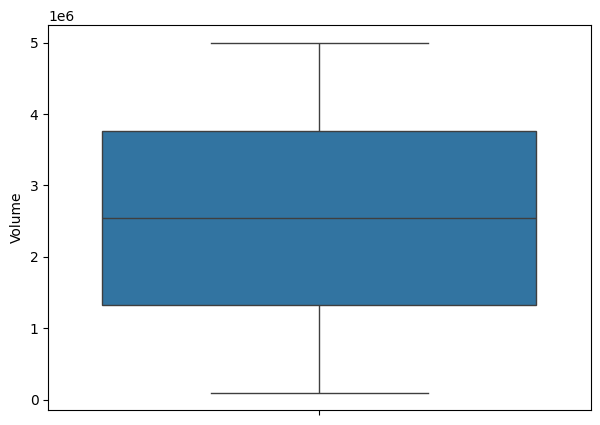

In [ ]:
# 9.Are there outliers in Volume?
plt.figure(figsize=(7,5))
sns.boxplot(df['Volume'])

### volume does not have outliers

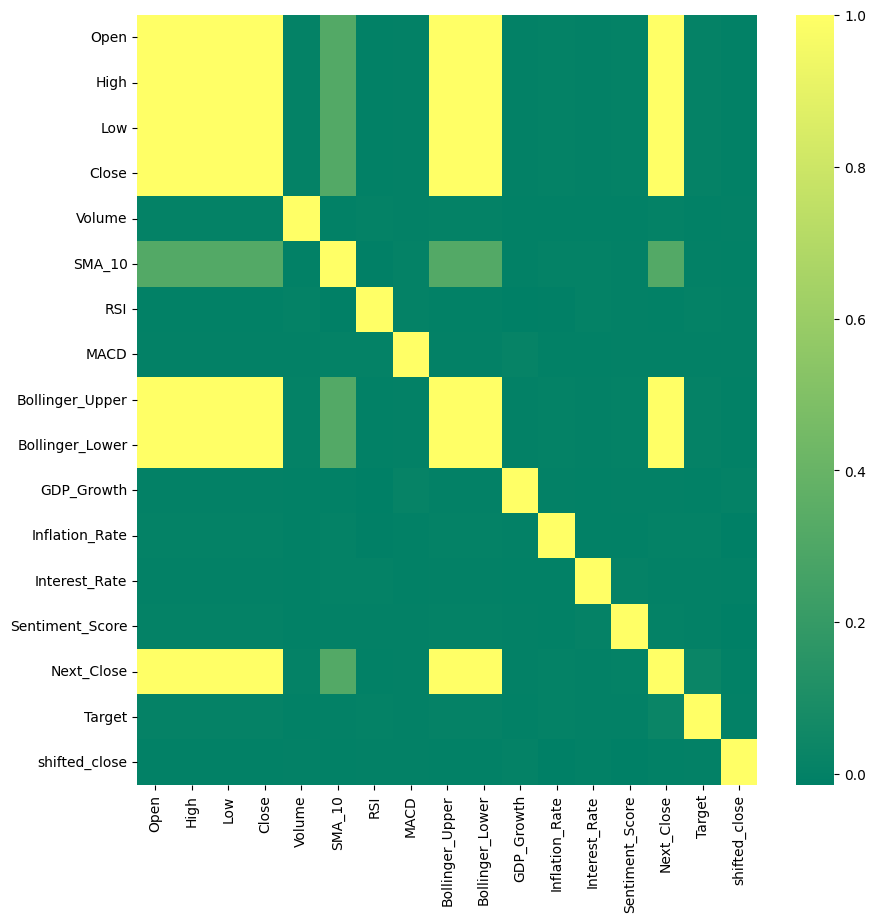

In [ ]:
# 10. Check correlation matrix.

corr_matrix = df.drop(['Stock', 'Date'], axis=1).corr()

plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,cmap='summer')
plt.show()

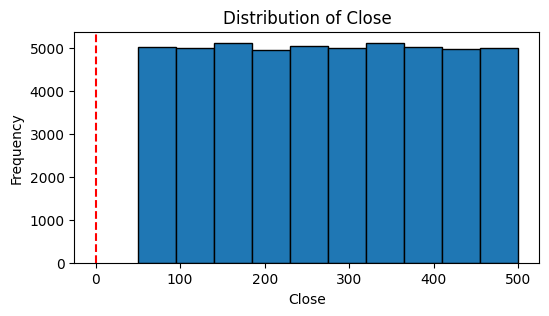

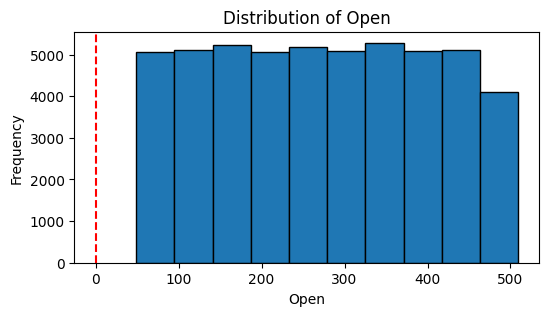

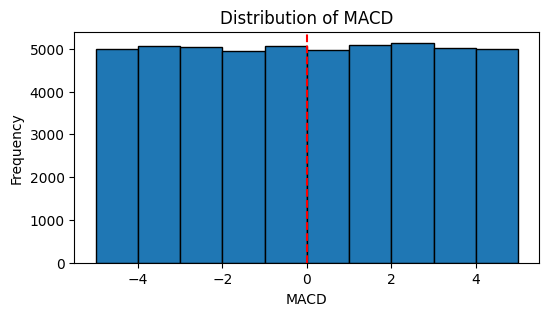

In [ ]:
# 11. Are there negative values in Close, Open, MACD, etc.?

cols_to_check = ['Close', 'Open', 'MACD']

for col in cols_to_check:
    plt.figure(figsize=(6,3))
    plt.hist(df[col], bins=10, edgecolor="black")
    plt.axvline(0, color='red', linestyle='--')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

### There is not any negative value in Open and Close but there is negative value in MACD

<Axes: ylabel='Interest_Rate'>

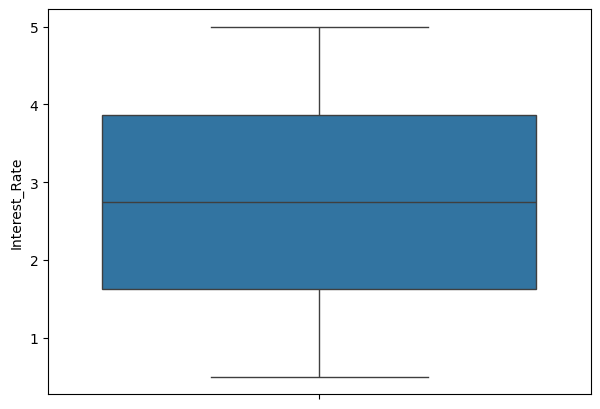

In [ ]:
# 12. Check for abrupt spikes in Interest Rate.
plt.figure(figsize=(7,5))
sns.boxplot(df['Interest_Rate'])

### **we can say that there is not any abrupt spike in Interest rate.**


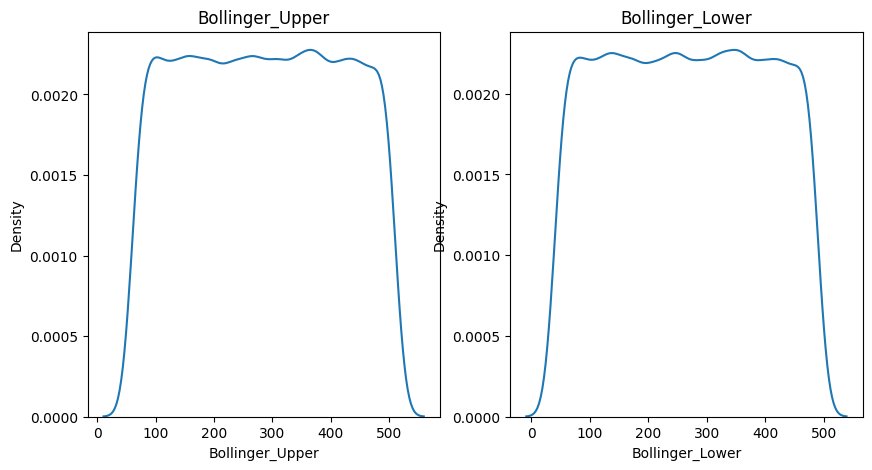

In [ ]:
# 13.Do Bollinger Bands make sense?
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sns.kdeplot(df['Bollinger_Upper'])
plt.title('Bollinger_Upper')

plt.subplot(1, 2, 2)
sns.kdeplot(df['Bollinger_Lower'])
plt.title('Bollinger_Lower')
plt.show()

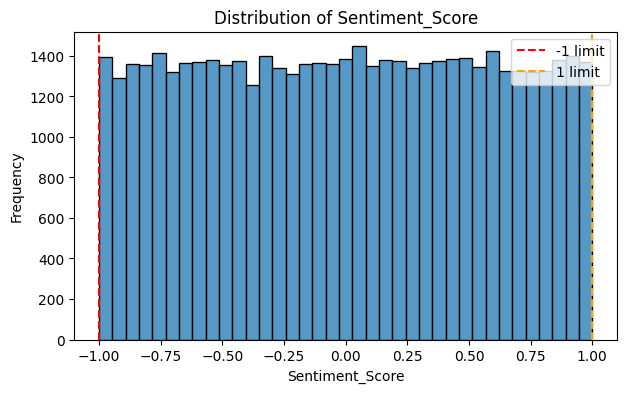

In [ ]:
# 14. Is Sentiment_Score standardized (between -1 and 1)?
plt.figure(figsize=(7,4))
sns.histplot(df['Sentiment_Score'])
plt.axvline(-1, color='red', linestyle='--', label='-1 limit')
plt.axvline(1, color='orange', linestyle='--', label='1 limit')

plt.title("Distribution of Sentiment_Score")
plt.xlabel("Sentiment_Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

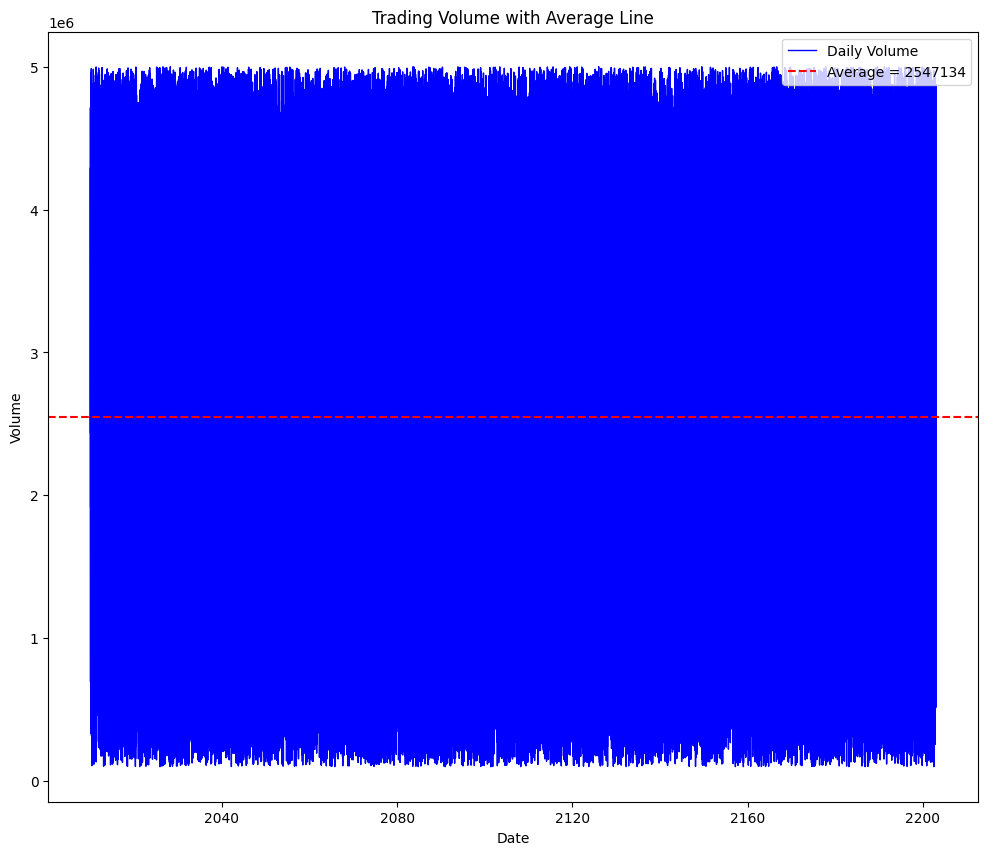

In [ ]:
# 15. What is the average trading volume?


df['Date'] = pd.to_datetime(df['Date'])
stock = df.sort_values('Date')


avg_volume = df['Volume'].mean()


plt.figure(figsize=(12,10))
plt.plot(stock['Date'], stock['Volume'], color='blue', linewidth=1, label='Daily Volume')
plt.axhline(avg_volume, color='red', linestyle='--', label=f'Average = {avg_volume:.0f}')

plt.title("Trading Volume with Average Line")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.legend()


plt.show()

24.814792746628534


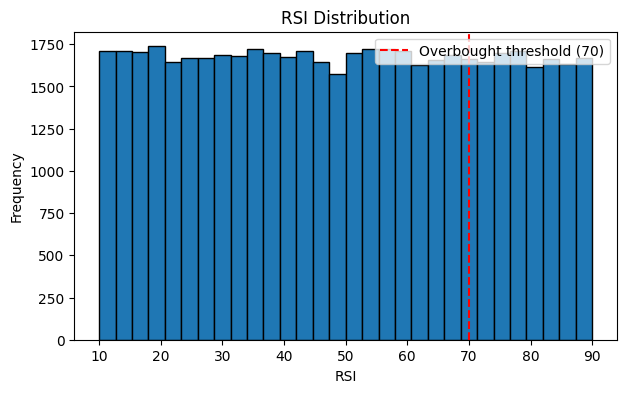

In [ ]:
# 16. What % of data has RSI > 70 (overbought zone)?
print(len(df[df['RSI'] > 70])/len(df)*100)
plt.figure(figsize=(7,4))
plt.hist(stock['RSI'], bins=30, edgecolor="black")
plt.axvline(70, color='red', linestyle='--', label='Overbought threshold (70)')

plt.title("RSI Distribution")
plt.xlabel("RSI")
plt.ylabel("Frequency")
plt.legend()
plt.show()

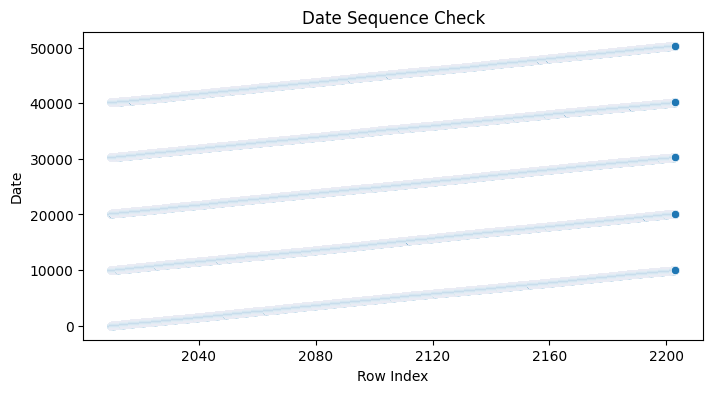

In [ ]:
# 17.  Check for monotonic date sequences.
plt.figure(figsize=(8,4))
sns.scatterplot(y=df.index, x=df['Date'])
plt.title("Date Sequence Check")
plt.xlabel("Row Index")
plt.ylabel("Date")
plt.show()

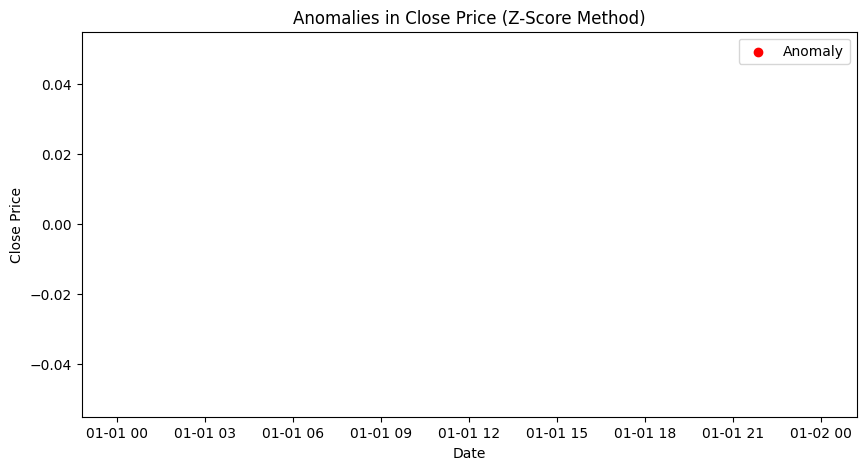

In [ ]:
# 18. Detect anomalies using Z-Score
import scipy.stats

# Calculate Z-score for the 'Close' price
df['Z_Score'] = np.abs(scipy.stats.zscore(df['Close']))

# Define a threshold for anomalies (e.g., 3 standard deviations)
threshold = 3

# Mark data points as anomalies if their Z-score exceeds the threshold
df['Anomaly'] = df['Z_Score'] > threshold

plt.figure(figsize=(10,5))
plt.scatter(df.loc[df['Anomaly'], 'Date'],
            df.loc[df['Anomaly'], 'Close'],
            color='red', label='Anomaly')
plt.title("Anomalies in Close Price (Z-Score Method)")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

### this data does not contain any anomalies

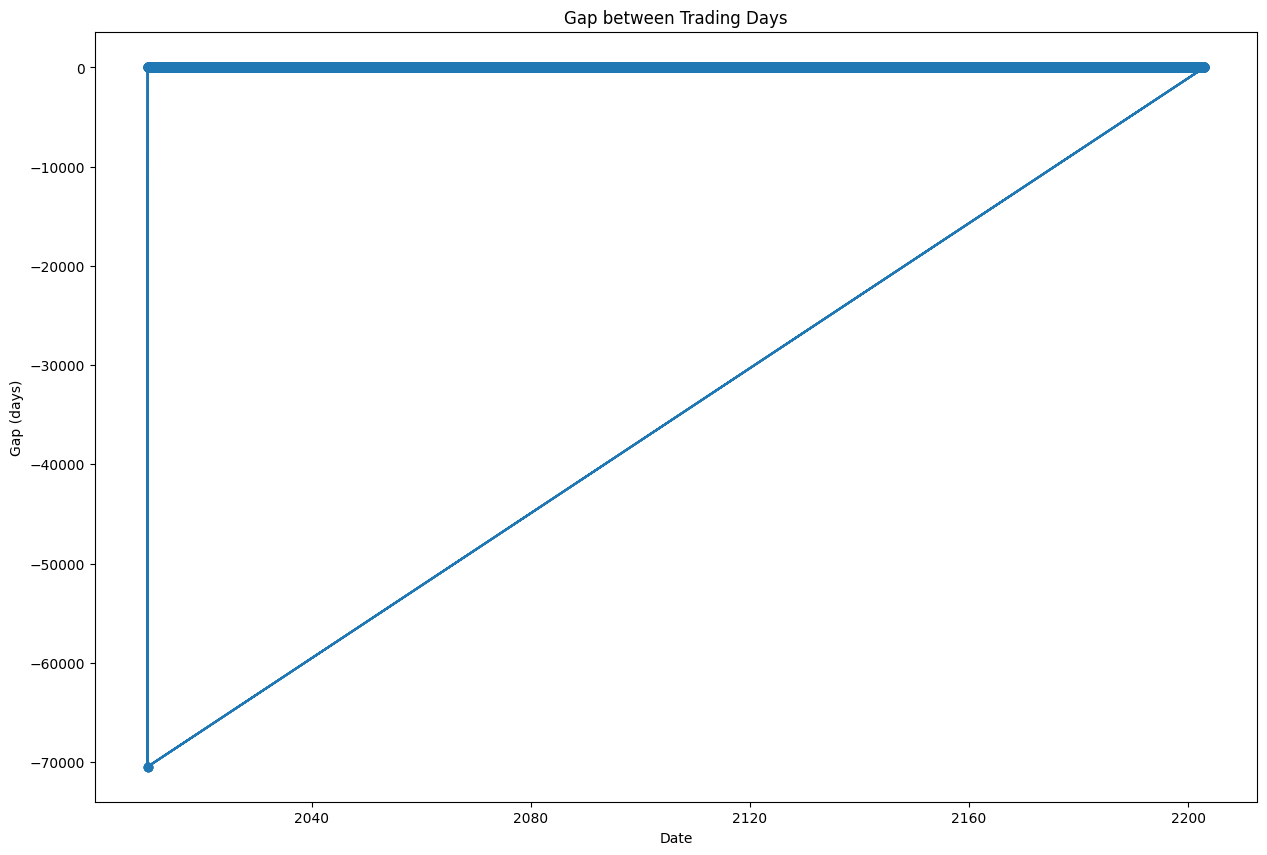

In [ ]:
# 19. Are the dates consecutive trading days (excluding weekends/holidays)?
df['Date'] = pd.to_datetime(df['Date'])
df['Diff'] = df['Date'].diff()
df['Diff'] = df['Diff'].dt.days

plt.figure(figsize=(15,10))
plt.plot(df['Date'], df['Diff'], marker='o')
plt.title("Gap between Trading Days")
plt.xlabel("Date")
plt.ylabel("Gap (days)")
plt.show()

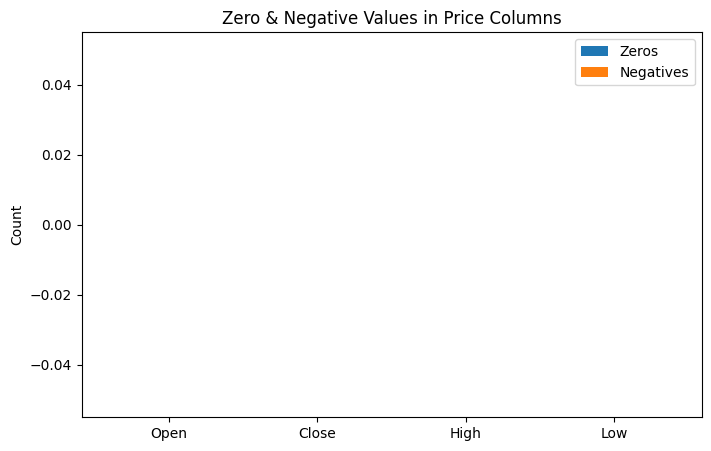

In [ ]:
# 20. Are any Open, Close, High, or Low values zero or negative?


cols = ['Open', 'Close', 'High', 'Low']


zeros = [(df[c] == 0).sum() for c in cols]
negatives = [(df[c] < 0).sum() for c in cols]


plt.figure(figsize=(8,5))
plt.bar(cols, zeros, label="Zeros")
plt.bar(cols, negatives, bottom=zeros, label="Negatives")  # stacked bar

plt.ylabel("Count")
plt.title("Zero & Negative Values in Price Columns")
plt.legend()
plt.show()

### so,here we can say that there is not a zero or negative value in this data

# **Insightful Analysis Questions**





274.9247340109256


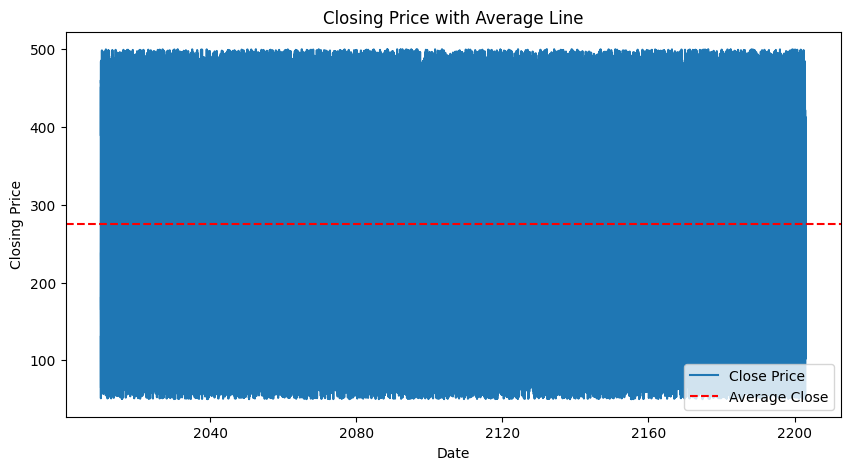

In [ ]:
# 1. What’s the average closing price over the dataset?
print(df['Close'].mean())

plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Close'], label="Close Price")
plt.axhline(df['Close'].mean(), color='red', linestyle='--', label="Average Close")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing Price with Average Line")
plt.legend()
plt.show()

Correlation with Target:
 Next_Close         0.027787
Close              0.006546
High               0.006522
Open               0.006489
Low                0.006425
Bollinger_Upper    0.006370
Bollinger_Lower    0.006347
Inflation_Rate     0.005515
Z_Score            0.003647
RSI                0.002518
Interest_Rate      0.000555
SMA_10             0.000348
MACD              -0.000489
shifted_close     -0.001541
Sentiment_Score   -0.002106
Volume            -0.002320
GDP_Growth        -0.003538
Diff              -0.004476
Anomaly                 NaN
Name: Target, dtype: float64


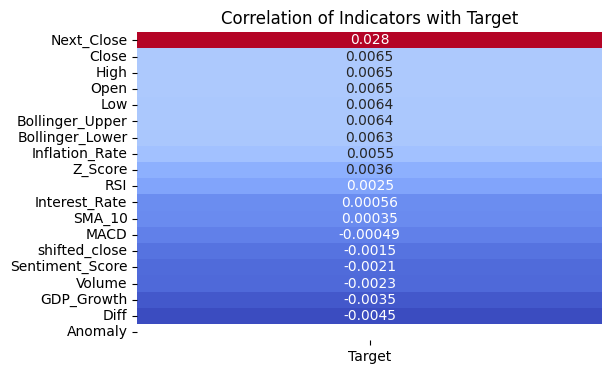

In [ ]:
# 2. Which technical indicator has the highest correlation with Target?


corr = df.corr(numeric_only=True)

target_corr = corr['Target'].drop('Target').sort_values(ascending=False)
print("Correlation with Target:\n", target_corr)


plt.figure(figsize=(6,4))
sns.heatmap(target_corr.to_frame(), annot=True, cmap="coolwarm", cbar=False)
plt.title("Correlation of Indicators with Target")
plt.show()

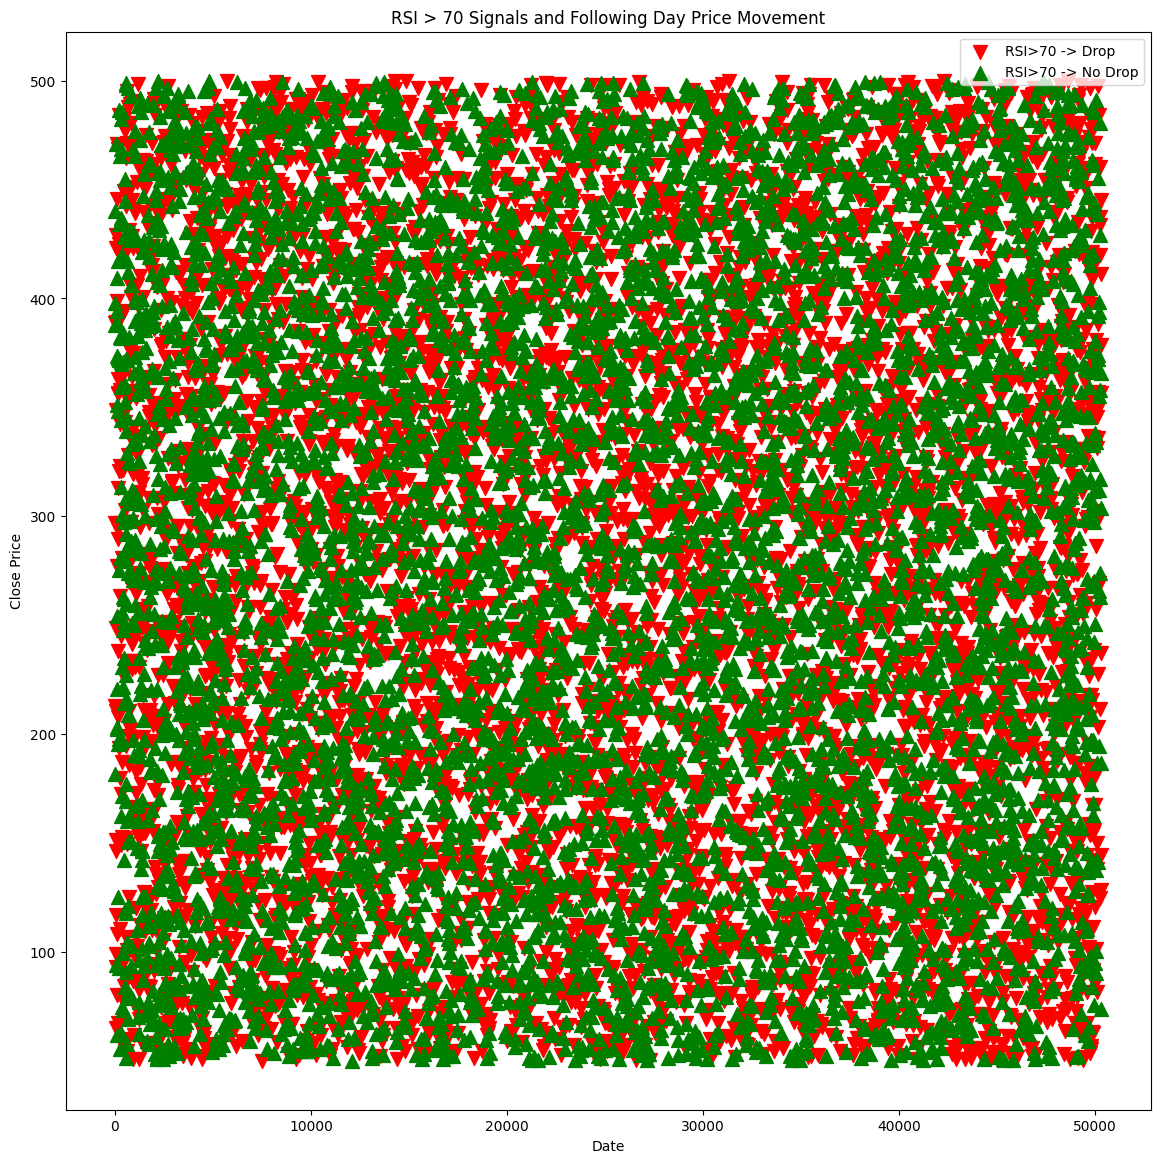

In [ ]:
# 3. Is RSI > 70 usually followed by a drop (Target = 0)?

signals = df[df['RSI'] > 70].copy()


signals['drop'] = signals['Target'] == 0


plt.figure(figsize=(14, 14))


# Plot markers for RSI>70 followed by drops vs non-drops
plt.scatter(signals.index[signals['drop']], signals['Close'][signals['drop']],
            color='red', label='RSI>70 -> Drop', marker='v', s=100)
plt.scatter(signals.index[~signals['drop']], signals['Close'][~signals['drop']],
            color='green', label='RSI>70 -> No Drop', marker='^', s=100)

plt.title('RSI > 70 Signals and Following Day Price Movement')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

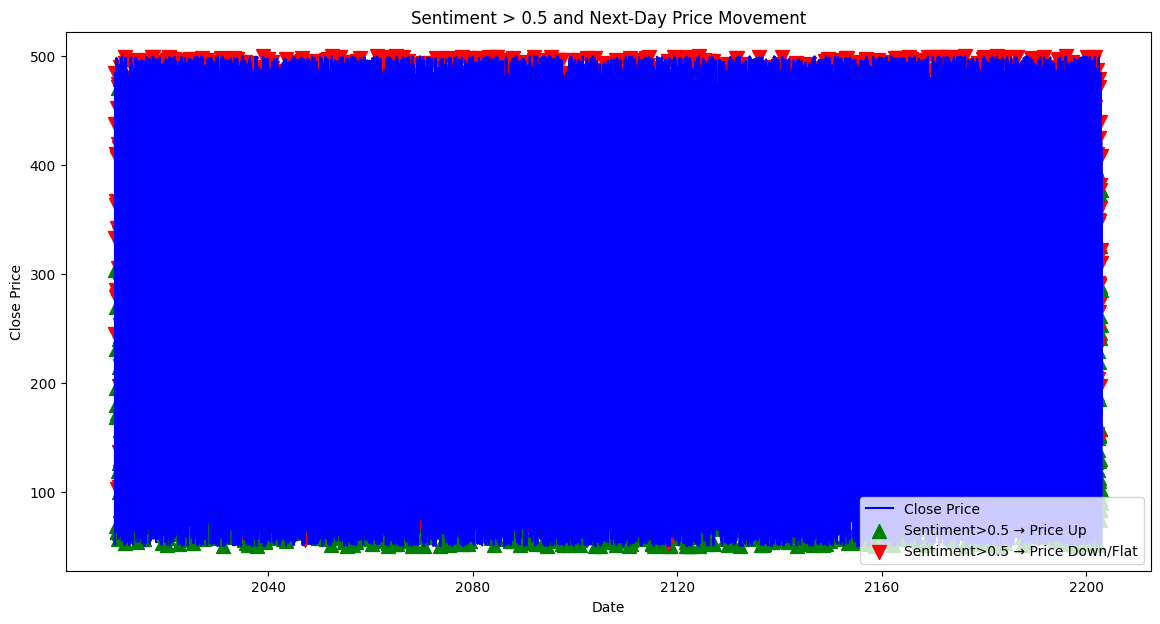

In [ ]:
# 4.



# Ensure date is datetime and sorted
stock['Date'] = pd.to_datetime(stock['Date'])
df = stock.sort_values('Date').set_index('Date')

# Create a signal when sentiment > 0.5
df['High_Sentiment'] = df['Sentiment_Score'] > 0.5

# Compute next-day price movement: 1 if price goes up, else 0
df['Next_Close'] = df['Close'].shift(-1)
df['Upward'] = (df['Next_Close'] > df['Close'])

# Filter rows where High_Sentiment is True
signals = df[df['High_Sentiment']].copy()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price', color='blue')

# Mark points where sentiment > 0.5 and followed by rise
plt.scatter(signals.index[signals['Upward'] == 1],
            signals['Close'][signals['Upward'] == 1],
            color='green', marker='^', s=100, label='Sentiment>0.5 → Price Up')

# Mark points where sentiment > 0.5 but no rise
plt.scatter(signals.index[signals['Upward'] == 0],
            signals['Close'][signals['Upward'] == 0],
            color='red', marker='v', s=100, label='Sentiment>0.5 → Price Down/Flat')

plt.title('Sentiment > 0.5 and Next-Day Price Movement')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
# 5.how does GDP growth effect stock market?
Corr = df['GDP_Growth'].corr(df['Close'])
Corr

np.float64(0.0004486679330884908)

## **It is seen that there is near 0% correlation between GDP growth and stockmarket.**